In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

#Load the datasets

In [ ]:
data = pd.read_csv('onlinefoods.csv', encoding = 'latin1')

FileNotFoundError: [Errno 2] No such file or directory: 'onlinefoods.csv'

In [ ]:
statistics = data.describe()
print(data.isnull().sum())

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


In [ ]:
label_encoder = LabelEncoder()
data['Output_encoded'] = label_encoder.fit_transform(data['Feedback'])
data_dummies = pd.get_dummies(data, drop_first = True)
data_dummies['out'] = (data['Output_encoded']>1).astype(int)

In [ ]:
x = data_dummies.drop(['out','size','Output_encoded'],axis = 1)
y = data_dummies['Family size']

#Exploratory Data Analysis (EDA)

In [ ]:
numeric_summary = data.describe()
print(numeric_summary)

NameError: name 'data' is not defined

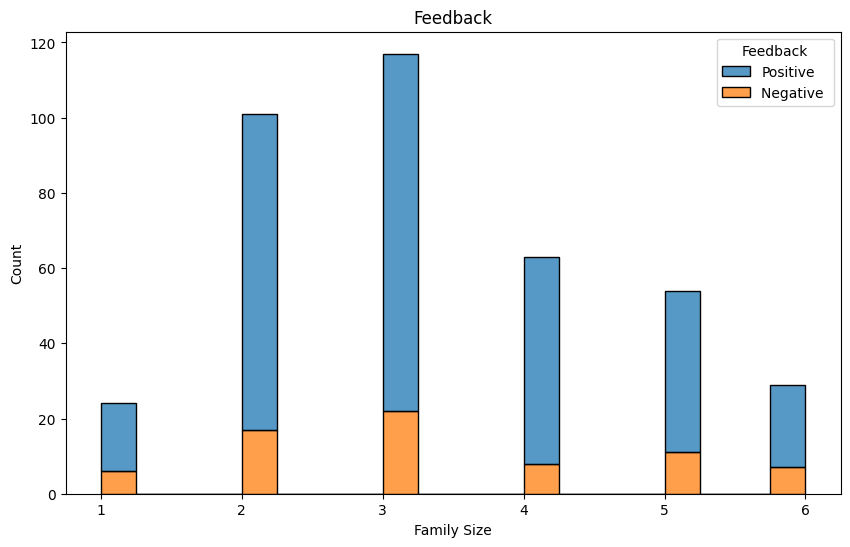

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Family size', hue='Feedback', multiple='stack', bins=20)
plt.title('Distribution of Family size and its Impact on Feedback')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Feedback')
plt.show()

#Logistic Regression Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: " ,{accuracy})
print("Confusion Matrix: ")
print(conf_matrix)
print(f"Classification Report: ")
print(class_report)

#Data Analysis and Visualization

<ipython-input-60-e2d59efd1c04>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_sorted, x='Coefficient', y='Feature', palette='viridis')


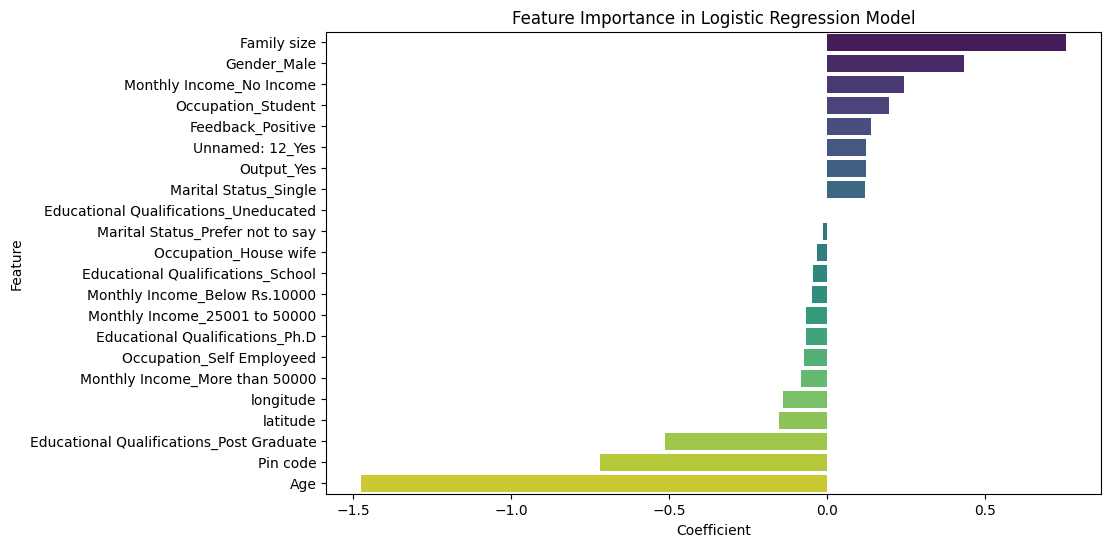

Feature Importance (Top 5):
                     Feature  Coefficient
1                Family size     0.755344
5                Gender_Male     0.433238
14  Monthly Income_No Income     0.244327
10        Occupation_Student     0.196978
20         Feedback_Positive     0.138423


In [ ]:
coefficients = model.coef_[0]
feature_names = x.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_sorted = feature_importance.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_sorted, x='Coefficient', y='Feature', palette='viridis')
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()
print("Feature Importance (Top 5):")
print(feature_importance_sorted.head())

In my logistic regression model, the 'Family size' feature has the highest positive coefficient, indicating that an increase in age is associated with a higher likelihood of positive feedback. Conversely, the 'Age' feature has a negative coefficient, suggesting that higher monthly income tends to decrease the likelihood of positive feedback. Meanwhile, the 'Feedback_positive' feature has a relatively small coefficient, indicating a less significant impact on feedback compared to other features. That's why I chose the Family size as my idendepent variable.

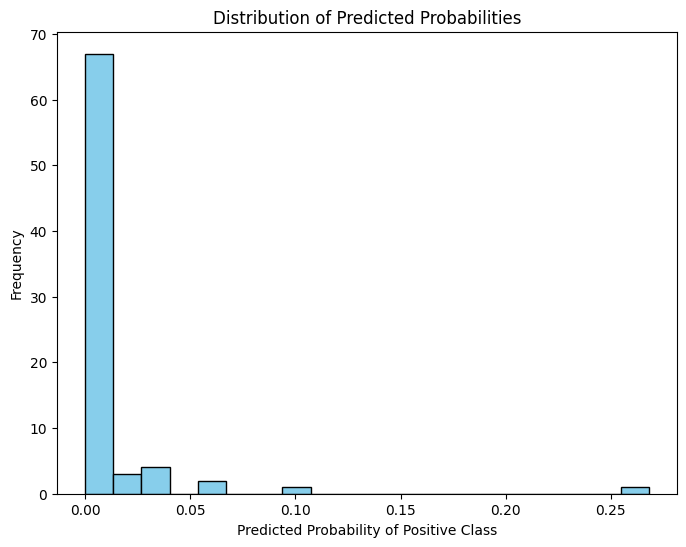

In [ ]:
predicted_probabilities = model.predict_proba(x_test_scaled)[:, 1]
plt.figure(figsize=(8, 6))
plt.hist(predicted_probabilities, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Frequency')
plt.show()

 You might observe a peak or concentration of predicted probabilities around certain values. This indicates areas where the model is more confident in its predictions. A wider spread of probabilities suggests uncertainty or variability in the model's predictions.